<a href="https://colab.research.google.com/github/Akashram28/WhaleCodaSiamese/blob/main/WhaleCodaSiameseETP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data processing steps are from [this](https://github.com/earthspecies/sperm-whale-clan-and-coda-detection) repository



In [ ]:
!pip install -Uqq fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 227.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 58.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires 

In [ ]:
!mkdir data

In [ ]:
!wget https://static-content.springer.com/esm/art%3A10.1038%2Fs41598-019-48909-4/MediaObjects/41598_2019_48909_MOESM2_ESM.xlsx -O data/Dominicana.xlsx
!wget https://static-content.springer.com/esm/art%3A10.1038%2Fs41598-019-48909-4/MediaObjects/41598_2019_48909_MOESM3_ESM.xlsx -O data/ETP.xlsx

--2024-07-31 12:43:58--  https://static-content.springer.com/esm/art%3A10.1038%2Fs41598-019-48909-4/MediaObjects/41598_2019_48909_MOESM2_ESM.xlsx
Resolving static-content.springer.com (static-content.springer.com)... 151.101.0.95, 151.101.64.95, 151.101.128.95, ...
Connecting to static-content.springer.com (static-content.springer.com)|151.101.0.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 867711 (847K) [application/octet-stream]
Saving to: ‘data/Dominicana.xlsx’

data/Dominicana.xls 100%[===================>] 847.37K  --.-KB/s    in 0.04s   

2024-07-31 12:43:58 (23.5 MB/s) - ‘data/Dominicana.xlsx’ saved [867711/867711]

--2024-07-31 12:43:58--  https://static-content.springer.com/esm/art%3A10.1038%2Fs41598-019-48909-4/MediaObjects/41598_2019_48909_MOESM3_ESM.xlsx
Resolving static-content.springer.com (static-content.springer.com)... 151.101.0.95, 151.101.64.95, 151.101.128.95, ...
Connecting to static-content.springer.com (static-content.springer.com)|

In [ ]:
from fastbook import *
import pandas as pd

In [ ]:
etp = pd.read_excel('data/ETP.xlsx')

In [ ]:
def get_target(row, col_name): return row[col_name]
get_clan_membership = partialler(get_target, col_name='Clan')

In [ ]:
def get_independent_vars(row, start_col=4, n_vals=9):
    vals = [v for v in row[start_col:(start_col+n_vals)].values if v != 0]
    return np.pad(vals, (n_vals - len(vals), 0))

get_ETP_independent_vars = partial(get_independent_vars, start_col=5, n_vals=11)
get_ETP_clan_membership = partialler(get_target, col_name='ClanName')

In [ ]:
etp.ClanName.unique()

array(['Regular', 'Short', 'FourPlus', 'PlusOne', nan, 'Caribbean', 'Tonga'], dtype=object)

In [ ]:
etp.dropna(inplace=True)

In [ ]:
etp.shape

(16853, 18)

In [ ]:
etp.ClanName.value_counts()

,count
ClanName,
Regular,6955
Short,4603
FourPlus,3082
PlusOne,1585
Caribbean,476
Tonga,152


In [ ]:
# etp = etp[~etp['ClanName'].isin(['Caribbean' , 'Tonga'])]
# etp.ClanName.value_counts()

In [ ]:
dataset_etp = Datasets(etp, [[get_ETP_independent_vars], [get_ETP_clan_membership]]); dataset_etp

(#16853) [(array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.531, 0.141, 0.127, 0.126, 0.138]), 'Regular'),(array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.526, 0.132, 0.128, 0.124, 0.143]), 'Regular'),(array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.491, 0.134, 0.129, 0.118, 0.109]), 'Regular'),(array([0.   , 0.   , 0.   , 1.411, 0.204, 0.194, 0.218, 0.202, 0.207, 0.206, 0.18 ]), 'Regular'),(array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.528, 0.133, 0.129, 0.13 , 0.137]), 'Regular'),(array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.538, 0.138, 0.133, 0.127, 0.14 ]), 'Regular'),(array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.534, 0.131, 0.137, 0.128, 0.137]), 'Regular'),(array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.549, 0.148, 0.135, 0.127, 0.139]), 'Regular'),(array([0.   , 0.   , 0.   , 1.032, 0.148, 0.147, 0.139, 0.142, 0.149, 0.144, 0.162]), 'Regular'),(array([0.   , 0.   , 0.   , 0.   , 0.   , 0.709, 0.148, 0.133, 0.132, 0.135, 0.16 ]), 'Regular')...]

In [ ]:
from fastai.vision.all import *
import torch
from torch import nn
from torch.utils.data import *
from collections import defaultdict
from sklearn.model_selection import train_test_split

### Generating n-tuplets

In [ ]:
def get_ETP_ntuplet_data(data, n_samples=10000, both=True):
    X_anchor, X_positive, X_negative = [], [], []
    cat_data = defaultdict(list)
    for item in data:
        cat_data[item[1]].append(item[0])
    categories = list(cat_data.keys())
    generated_tuples = set()
    count = 0

    while count < n_samples:
        anchor_category = random.choice(categories)

        anchor = random.choice(cat_data[anchor_category])
        positives = random.choice(cat_data[anchor_category])
        negatives = [random.choice(cat_data[cat]) for cat in categories if cat != anchor_category]

        X_anchor.append(anchor)
        X_positive.append(positives)
        X_negative.append(negatives)

        count += 1

    X_anchor = torch.from_numpy(np.array(X_anchor)).float()
    X_positive = torch.from_numpy(np.array(X_positive)).float()
    X_negative = torch.from_numpy(np.array(X_negative)).float()
    return X_anchor, X_positive, X_negative

In [ ]:
# X_anchor, X_positive, X_negative = get_ETP_triplet_data(dataset_etp,30000)
X_anchor, X_positive, X_negative = get_ETP_ntuplet_data(dataset_etp,10000)

X_anchor_train, X_anchor_val, X_positive_train, X_positive_val, X_negative_train, X_negative_val = train_test_split(X_anchor, X_positive, X_negative, test_size=0.2, random_state=42)

train_dataset = TensorDataset(X_anchor_train, X_positive_train, X_negative_train)
val_dataset = TensorDataset(X_anchor_val, X_positive_val, X_negative_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
### Model

In [ ]:
class SiameseNetwork(nn.Module):
  def __init__(self):
    super(SiameseNetwork, self).__init__()
    # 1D Convolutional layers
    self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
    self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
    self.conv3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, padding=1)

    # Fully connected layers
    self.fc1 = nn.Linear(64 * 11, 128)
    self.fc2 = nn.Linear(128, 128)
    self.fc3 = nn.Linear(128, 128)

  def forward_one(self, x):
    x = x.unsqueeze(1)
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = F.relu(self.conv3(x))

    x = x.view(x.size(0), -1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def forward(self, input1, input2, inputs):
    output1 = self.forward_one(input1)
    output2 = self.forward_one(input2)
    outputs = []
    # print(type(inputs))
    inputs_arr = torch.stack(inputs)
    for i in range(len(inputs)):
      # print(inputs_arr[:, :, i, :][0])
      outputs.append(self.forward_one(inputs_arr[:, :, i, :][0]))
    return output1, output2, outputs

class SiameseNet(nn.Module):
  def __init__(self):
    super(SiameseNet, self).__init__()
    self.embedding_net = SiameseNetwork()

  def forward(self, x1, x2, *xs):
    out1, out2, outs = self.embedding_net(x1, x2, *xs)
    return out1, out2, outs

  def get_embedding(self, x):
    return self.embedding_net.forward_one(x)

### N-Tuplet Loss

In [ ]:
class NTupletLoss(nn.Module):
  def __init__(self, margin):
    super(NTupletLoss, self).__init__()
    self.margin = margin

  def forward(self, anchor, positive, negatives):
    positive_distance = F.pairwise_distance(anchor, positive)
    losses = [F.relu(positive_distance - F.pairwise_distance(anchor, negative) + self.margin) for negative in negatives]
    return torch.stack(losses).mean()


In [ ]:
def compute_accuracy(anchor, positive, negatives):
  positive_distance = F.pairwise_distance(anchor, positive)
  correct = 0
  for negative in negatives:
    negative_distance = F.pairwise_distance(anchor, negative)
    correct += (positive_distance < negative_distance).float().sum().item()
  accuracy = correct / (len(negatives) * anchor.size(0)) # correct in all batches / total pairs in one batch * batchsize
  return accuracy


def evaluate_model(model, dataloader, criterion):
  model.eval()  # Set model to evaluation mode
  total_loss = 0
  total_accuracy = 0
  with torch.no_grad():
    for anchor, positive, *negatives in dataloader:
      anchor, positive, negatives = anchor.float(), positive.float(), [neg.float() for neg in negatives]
      # print(negatives)
      output_anchor, output_positive, output_negatives = model(anchor, positive, negatives)
      loss = criterion(output_anchor, output_positive, output_negatives)
      accuracy = compute_accuracy(output_anchor, output_positive, output_negatives)
      total_loss += loss.item()
      total_accuracy += accuracy
  avg_loss = total_loss / len(dataloader)
  avg_accuracy = total_accuracy / len(dataloader)
  return avg_loss, avg_accuracy


In [ ]:
model = SiameseNet()
lr = 1e-3
criterion = NTupletLoss(margin=1.0)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.1, threshold=0.01, patience=5, min_lr=1e-4)

train_l = []
train_acc = []
val_l = []
val_acc = []
num_epochs = 50
for epoch in range(num_epochs):
  model.train()  # Set model to training mode
  total_loss = 0
  total_accuracy = 0
  for anchor, positive, *negatives in train_loader:
    anchor, positive, negatives = anchor.float(), positive.float(), [neg.float() for neg in negatives]
    optimizer.zero_grad()
    output_anchor, output_positive, output_negatives = model(anchor, positive, negatives)
    loss = criterion(output_anchor, output_positive, output_negatives)
    loss.backward()
    optimizer.step()

    accuracy = compute_accuracy(output_anchor, output_positive, output_negatives)
    total_loss += loss.item()
    total_accuracy += accuracy

  avg_train_loss = total_loss / len(train_loader)
  avg_train_accuracy = total_accuracy / len(train_loader)

  val_loss, val_accuracy = evaluate_model(model, val_loader, criterion)
  scheduler.step(val_loss)

  print(f'Epoch {epoch+1}/{num_epochs}')
  print('lr: ' + str(optimizer.param_groups[0]['lr']))
  print(f'Train Loss: {avg_train_loss:.4f}, Train Accuracy: {avg_train_accuracy:.4f}')
  print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')
  train_l.append(avg_train_loss)
  train_acc.append(avg_train_accuracy)
  val_l.append(val_loss)
  val_acc.append(val_accuracy)


Epoch 1/50
lr: 0.001
Train Loss: 0.4400, Train Accuracy: 0.8226
Validation Loss: 0.3359, Validation Accuracy: 0.8700
Epoch 2/50
lr: 0.001
Train Loss: 0.2836, Train Accuracy: 0.8902
Validation Loss: 0.2814, Validation Accuracy: 0.8943
Epoch 3/50
lr: 0.001
Train Loss: 0.2565, Train Accuracy: 0.9038
Validation Loss: 0.2619, Validation Accuracy: 0.9053
Epoch 4/50
lr: 0.001
Train Loss: 0.2348, Train Accuracy: 0.9119
Validation Loss: 0.2355, Validation Accuracy: 0.9072
Epoch 5/50
lr: 0.001
Train Loss: 0.2214, Train Accuracy: 0.9146
Validation Loss: 0.2243, Validation Accuracy: 0.9107
Epoch 6/50
lr: 0.001
Train Loss: 0.2079, Train Accuracy: 0.9205
Validation Loss: 0.2138, Validation Accuracy: 0.9211
Epoch 7/50
lr: 0.001
Train Loss: 0.1940, Train Accuracy: 0.9261
Validation Loss: 0.1953, Validation Accuracy: 0.9296
Epoch 8/50
lr: 0.001
Train Loss: 0.1846, Train Accuracy: 0.9314
Validation Loss: 0.1838, Validation Accuracy: 0.9281
Epoch 9/50
lr: 0.001
Train Loss: 0.1788, Train Accuracy: 0.9346


### Testing

In [ ]:
X_anchor_test, X_positive_test, X_negative_test = get_ETP_ntuplet_data(dataset_etp,1000)

test_dataset = TensorDataset(X_anchor_test, X_positive_test, X_negative_test)

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

test_loss, test_accuracy = evaluate_model(model, test_loader,criterion)

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.1162, Test Accuracy: 0.9600


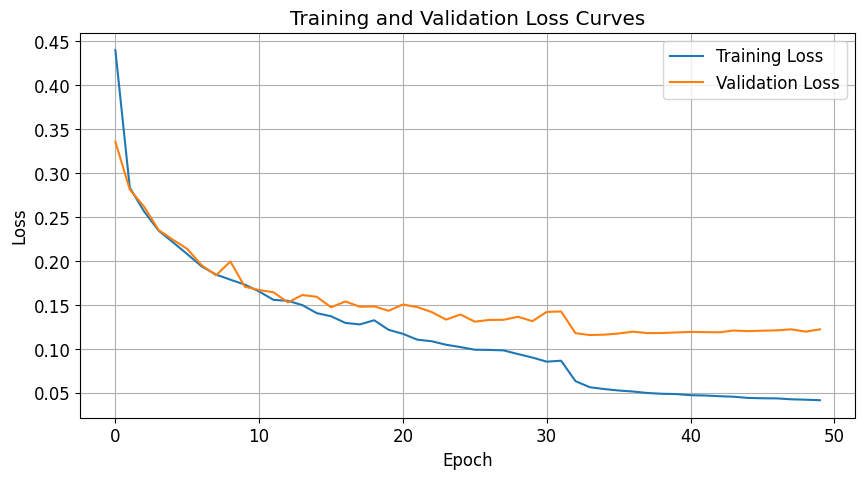

In [ ]:
def plot_loss_curves(train_losses, val_losses):
  plt.figure(figsize=(10, 5))
  plt.plot(train_losses, label='Training Loss')
  plt.plot(val_losses, label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss Curves')
  plt.legend()
  plt.grid(True)
  plt.show()
plot_loss_curves(train_l, val_l)


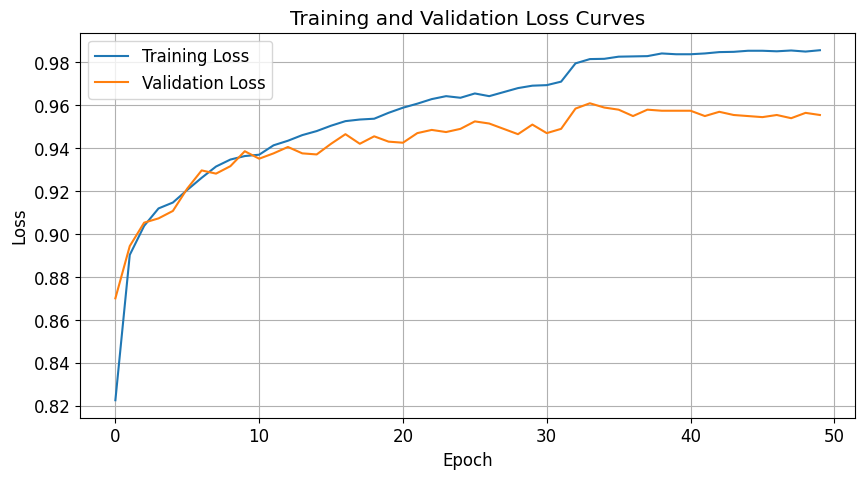

In [ ]:
def plot_acc_curves(train_acc, val_acc):
  plt.figure(figsize=(10, 5))
  plt.plot(train_acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title('Training and Validation Accuracy Curves')
  plt.legend()
  plt.grid(True)
  plt.show()
plot_loss_curves(train_acc, val_acc)

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

In [ ]:
# Function to extract features and labels from the dataset
def extract_features_and_labels(dataset_etp,n_samples = 5000):
    features = []
    labels = []
    cat_data = defaultdict(list)
    for item in dataset_etp:
      cat_data[item[1]].append(item[0])
    categories = list(cat_data.keys())
    for _ in range(n_samples):
      cat = random.choice(categories)
      feature = random.choice(cat_data[cat])
      features.append(feature)
      labels.append(cat)
    # for _ in range(n_samples):
    #     data_point = random.choice(dataset_etp)
    #     feature_vector, label = data_point
    #     features.append(feature_vector)
    #     labels.append(label)
    return np.array(features), np.array(labels)

# Function to get unique categories
def get_categories(labels):
    return np.unique(labels)

# Function to visualize features using t-SNE
def visualize_tsne(features, labels, categories):
    # Initialize t-SNE and fit_transform
    tsne = TSNE(n_components=2, random_state=0)
    reduced_features = tsne.fit_transform(features)

    # Create a color map based on the number of categories
    colors = plt.cm.get_cmap('Paired', len(categories))

    # Create a scatter plot
    plt.figure(figsize=(10, 8))
    for i, category in enumerate(categories):
        # Extract indices for the current category
        indices = np.where(labels == category)[0]
        # Plot the data points for this category
        plt.scatter(reduced_features[indices, 0], reduced_features[indices, 1],
                    color=colors(i), label=category, alpha=0.5)

    plt.title('t-SNE visualization of data')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend()
    plt.show()

In [ ]:
def visualize_tsne_3d(features, labels, categories):
    # Initialize t-SNE and fit_transform
    tsne = TSNE(n_components=3, random_state=0)
    reduced_features = tsne.fit_transform(features)

    # Create a color map based on the number of categories
    colors = plt.cm.get_cmap('Paired', len(categories))

    # Create a 3D scatter plot
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    for i, category in enumerate(categories):
        # Extract indices for the current category
        indices = np.where(labels == category)[0]
        # Plot the data points for this category
        ax.scatter(reduced_features[indices, 0], reduced_features[indices, 1], reduced_features[indices, 2],
                   color=colors(i), label=category, alpha=0.5)

    ax.set_title('t-SNE 3D visualization of data')
    ax.set_xlabel('t-SNE Component 1')
    ax.set_ylabel('t-SNE Component 2')
    ax.set_zlabel('t-SNE Component 3')
    ax.legend()
    plt.show()

<ipython-input-47-f2119f4e7ac4>:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Paired', len(categories))


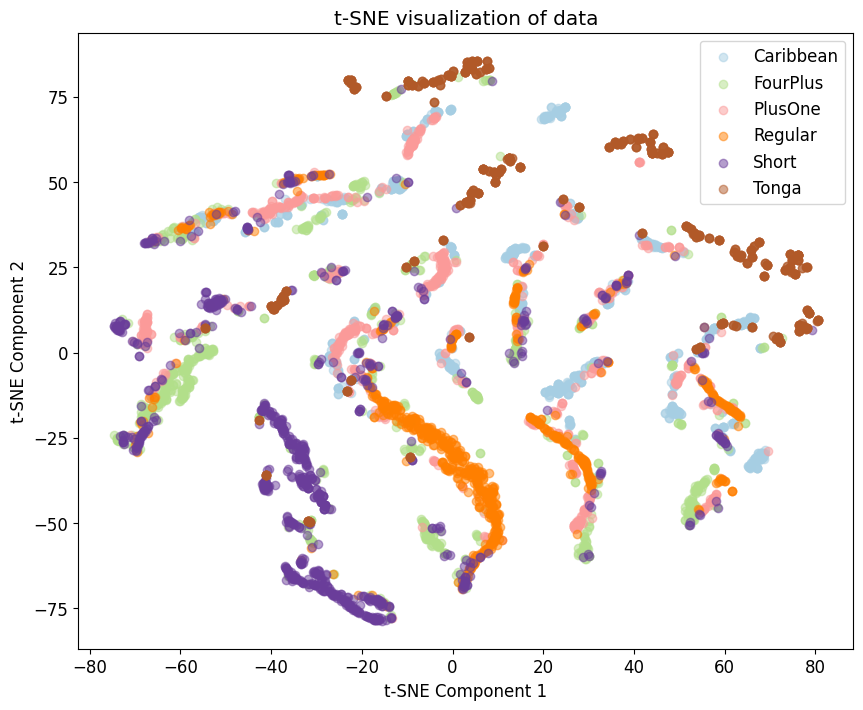

In [ ]:
features, labels = extract_features_and_labels(dataset_etp)

# Get categories
categories = get_categories(labels)

# Visualize using t-SNE
visualize_tsne(features, labels, categories)

<ipython-input-48-b18ee8576de3>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Paired', len(categories))


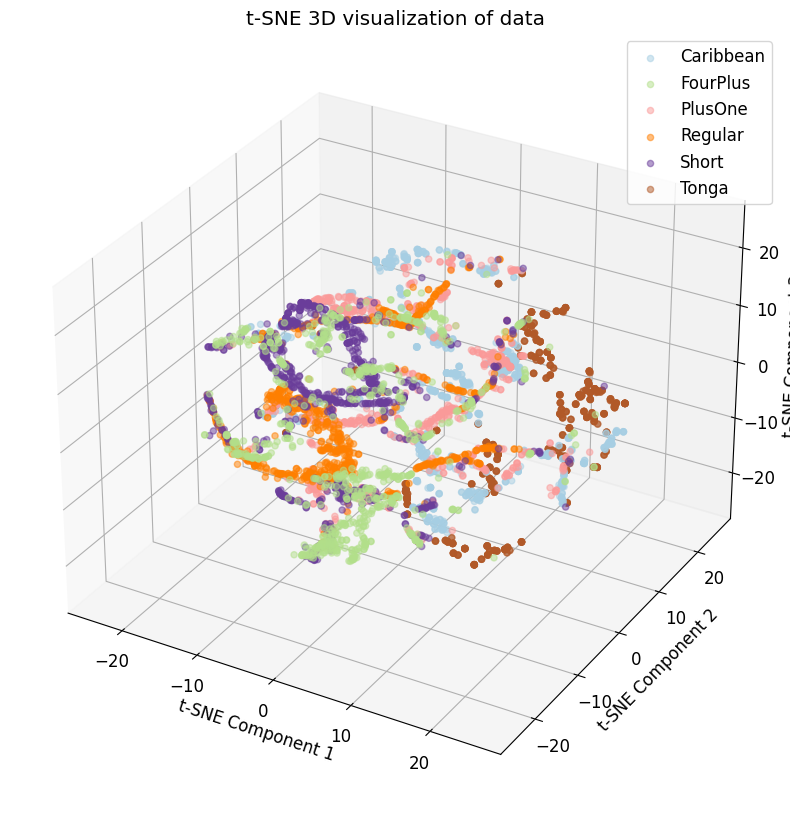

In [ ]:
visualize_tsne_3d(features, labels, categories)

In [ ]:
model_path = 'siamese_network_etp.pth'
torch.save(model.state_dict(), model_path)
print(f'Model saved to {model_path}')


Model saved to siamese_network_etp.pth


In [ ]:
np.unique(labels, return_counts=True) # A fair representation of each class

(array(['Caribbean', 'FourPlus', 'PlusOne', 'Regular', 'Short', 'Tonga'], dtype='<U9'),
 array([892, 838, 802, 794, 857, 817]))